In [ ]:
###Итогове задание

"""
Задание 1
Загрузите в библиотеку Pandas DataFrame из CSV-файла исходные данные о покупателях с веб-портала (все строки). 
При необходимости преобразуйте данные.

Задание 2
Выполните анализ используемых браузеров, устройств, пола, региона, сумм покупки. 
Сформируйте сводные таблицы с указанием min, max, avg, median по суммам покупки. 
Чтобы выполнить задание, нужно использовать библиотеку Pandas.

Задание 3
Оцените зависимость суммы покупки от региона. 
Выполните визуализацию результатов анализа зависимости. 
Чтобы выполнить задание, можно использовать библиотеки Seaborn или Plotly (по вашему выбору).

Задание 4
Определите совокупность факторов, которые положительно и отрицательно влияют на сумму покупки. 
Сформулируйте рекомендации по кратному увеличению продаж с учётом полученных результатов. 
Выполните визуализацию результатов анализа зависимости. 
Чтобы выполнить задание, можно использовать библиотеки Pandas и Seaborn или Plotly (по вашему выбору).
"""

In [1]:
import numpy as np
import pandas as pd

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Задание 1
DataFrame = pd.read_csv('web_clients_correct.csv')
DataFrame.head()


,name,device_type,browser,sex,age,bill,region
0,Allen Miss. Elisabeth Walton,mobile,Chrome,female,29.0,885,St Louis: MO
1,Allison Master. Hudson Trevor,tablet,Opera,male,48.0,850,Montreal: PQ / Chesterville: ON
2,Allison Miss. Helen Loraine,laptop,Firefox,female,48.0,1034,Montreal: PQ / Chesterville: ON
3,Allison Mr. Hudson Joshua Creighton,desktop,Internet Explorer,male,30.0,214,Montreal: PQ / Chesterville: ON
4,Allison Mrs. Hudson J C (Bessie Waldo Daniels),laptop,Firefox,female,25.0,993,Montreal: PQ / Chesterville: ON


In [89]:
## Задание 2 

#сводка по браузерам
pd.pivot_table(DataFrame, index=['browser'], values='bill',
               aggfunc={'bill': ['min', 'max', 'mean', 'median']})

,max,mean,median,min
browser,,,,
Chrome,1500.0,764.770492,756.0,40.0
Firefox,1496.0,799.096667,804.0,33.0
Internet Explorer,1477.0,717.335714,694.5,60.0
Opera,1493.0,794.658824,846.5,35.0


In [88]:
# сводка по устройствам
pd.pivot_table(DataFrame, index=['device_type'], values='bill',
               aggfunc={'bill': ['min', 'max', 'mean', 'median']})

,max,mean,median,min
device_type,,,,
desktop,1485.0,793.837104,820.0,34.0
laptop,1477.0,801.832579,823.0,42.0
mobile,1497.0,738.429787,735.0,40.0
tablet,1500.0,766.088235,744.0,33.0


In [40]:
# сводка по полу
pd.pivot_table(DataFrame, index=['sex'], values='bill', 
               aggfunc={'bill': ['min', 'max', 'mean', 'median']})

,max,mean,median,min
sex,,,,
female,1500.0,773.683140,769.0,33.0
male,1497.0,774.704028,789.0,34.0


In [49]:
# сводка по региону
Region = pd.pivot_table(DataFrame, index=['region'], values='bill',
                        aggfunc={'bill': ['min', 'max', 'mean', 'median']})
Region.head()

,max,mean,median,min
region,,,,
-,1472.0,769.300578,769.0,45.0
?Havana: Cuba,141.0,141.000000,141.0,141.0
Aberdeen / Portland: OR,1028.0,630.000000,630.0,232.0
Albany: NY,1278.0,1278.000000,1278.0,1278.0
Altdorf: Switzerland,1441.0,1218.000000,1218.0,995.0


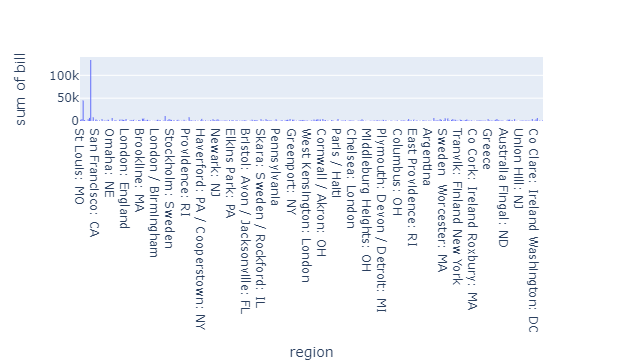

In [63]:
##Задание 3

# Попробуем построить базовую гистограмму распределения по регионам
fig = px.histogram(DataFrame, x="region", y="bill" )
fig.show()

In [ ]:
# В результате больше всего продаж по "неизвестным" локациям. 
# Отфильтруем данные и пранализируем еще раз


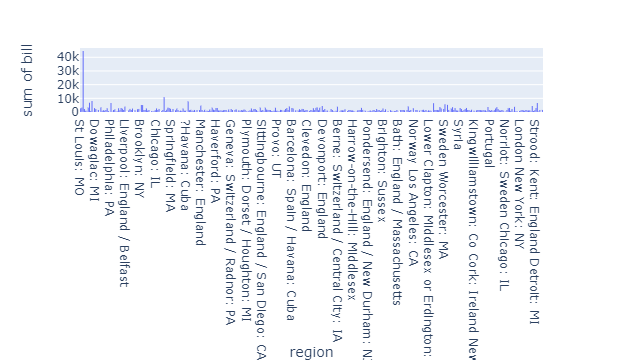

'\nНемного увеличив диаграмму получаем результат:\nБольше всенго продаж по региону "New York: NY" 44.441k\n'

In [71]:
df_without = DataFrame.loc[DataFrame['region'] != '-']
fig = px.histogram(df_without, x="region", y="bill" )
fig.show()

'''
Немного увеличив диаграмму получаем результат:
Больше всенго продаж по региону "New York: NY" 44.441k
'''

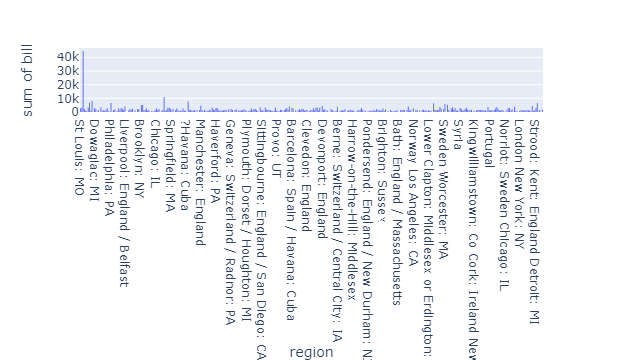

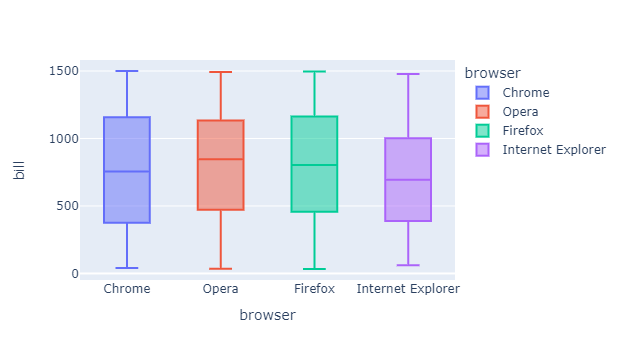

In [91]:
'''
Задание 4
Определите совокупность факторов, которые положительно и отрицательно влияют на сумму покупки. 
Сформулируйте рекомендации по кратному увеличению продаж с учётом полученных результатов. 
Выполните визуализацию результатов анализа зависимости. 
Чтобы выполнить задание, можно использовать библиотеки Pandas и Seaborn или Plotly (по вашему выбору).
'''

fig = px.box(DataFrame, x="browser", y="bill", color = "browser")
fig.show()

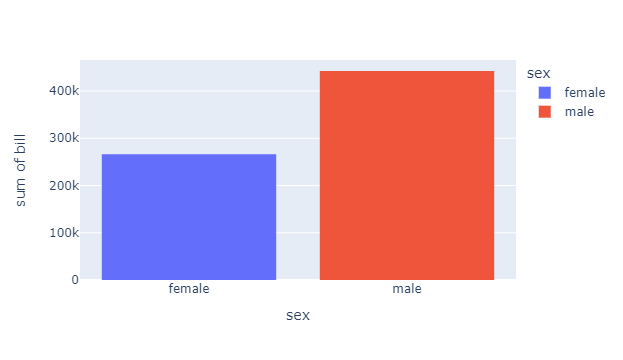

In [82]:
fig = px.histogram(DataFrame, x="sex", y="bill", color = "sex" )
fig.show()

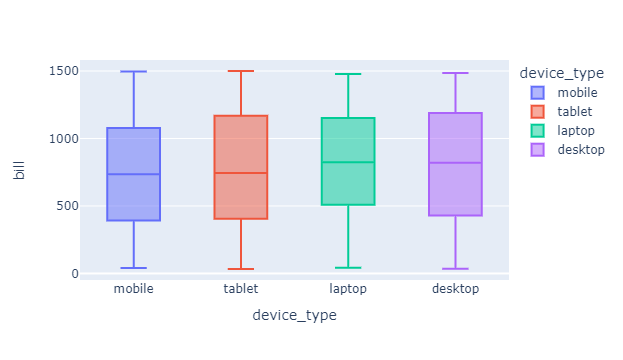

In [92]:
fig = px.box(DataFrame, x="device_type", y="bill", color = "device_type")
fig.show()

In [100]:
'''
Дальше попробуем проанализировать возраст наших покупателей.
Для этого разделим из на несоклько групп
'''
#Сделаем доп колонку с категорией возраста
df_2 = DataFrame
df_2.insert(2, "Age_category",'')

ValueError: cannot insert Age_category, already exists

In [101]:
#Проведем фильтрацию
def age_category(x):
    if x < 18:
        return 'Младше 18'
    elif 18 <= x <= 35:
        return 'Молодежь 18-35'
    elif 35 < x <= 65:
        return 'Зрелые 35-65'
    else:
        return 'Пенсионеры 65+'
df_2['Age_category'] = df_2['age'].apply(age_category)
print(df_2.loc[:15, ['Age_category','age']])

      Age_category   age
0   Молодежь 18-35  29.0
1     Зрелые 35-65  48.0
2     Зрелые 35-65  48.0
3   Молодежь 18-35  30.0
4   Молодежь 18-35  25.0
5     Зрелые 35-65  48.0
6     Зрелые 35-65  63.0
7     Зрелые 35-65  39.0
8     Зрелые 35-65  53.0
9   Пенсионеры 65+  71.0
10    Зрелые 35-65  47.0
11    Зрелые 35-65  48.0
12  Молодежь 18-35  24.0
13  Молодежь 18-35  26.0
14  Пенсионеры 65+  80.0
15    Зрелые 35-65  48.0


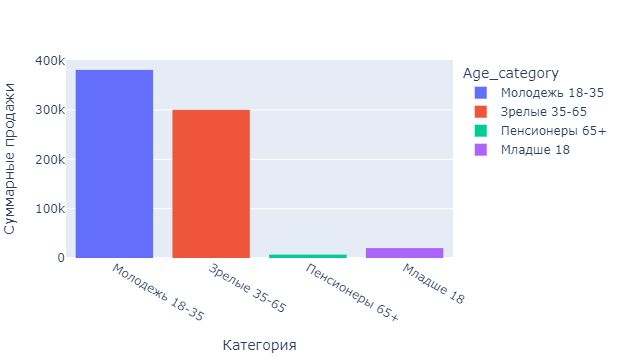

In [123]:
fig = px.histogram(df_2, x="Age_category", y="bill", color ='Age_category')
fig.update_layout(xaxis_title ="Категория",
                  yaxis_title ="Суммарные продажи",
                  margin=dict(l = 10, r=15, b=100))
fig.show()

In [ ]:
### Выводы

'''
В результате анализа данных можем сделать следующие выводы об аудитории продкута:

* Преимущественно аудиторию составляюю мужчины и женщины от 18 до 35 лет.
* Большинство покупок совершают мучины
* Распределеине по устрйсвам и брауберам практически равнозначно, однако наибольшее число покупок совершается через ПК и Goolge Chrome
* Больше всего покупок совертается в New York: NY

Рекомендации

1. Запустить таргетированную рекламу на самую платежеспособную аудиторию.
2. Добавть новые товары в магазин для указанных категорий потребителей. Здесь важно 
не забыть про вторую самую покупающую категорию (35-65).
3. Открыть в Нью-Йорке дополнительный склад, а в идеале торговую точку